In [ ]:
# python garmindb_cli.py --activities --download --import --analyze --latest                                                                                  

# Summary Graphs
Graphs of data across multiple years sampled weekly.

In [1]:
from IPython.display import display, Markdown
import snakemd
import datetime

from garmindb import ConfigManager
from garmindb.garmindb import GarminSummaryDb, YearsSummary

from jupyter_funcs import format_number
from graphs import Graph

years_to_display = 4
days_to_display = (years_to_display * 365)

db_params_dict = ConfigManager.get_db_params()
garmin_sum_db = GarminSummaryDb(db_params_dict)

graph = Graph()

### Heart Rate

| Year | Avg Resting HR | Min Resting HR | Max Resting HR | Avg HR | Min HR | Max HR |
| ---- | -------------- | -------------- | -------------- | ------ | ------ | ------ |
| 2020 | 58.0           | 48.0           | 79.0           | 74.0   | 37.0   | 185.0  |
| 2021 | 57.0           | 47.0           | 73.0           | 73.0   | 30.0   | 243.0  |
| 2022 | 55.0           | 46.0           | 66.0           | 75.0   | 44.0   | 179.0  |
| 2023 | 55.0           | 49.0           | 64.0           | 75.0   | 44.0   | 243.0  |
| 2024 | 53.0           | 48.0           | 58.0           | 73.0   | 47.0   | 179.0  |

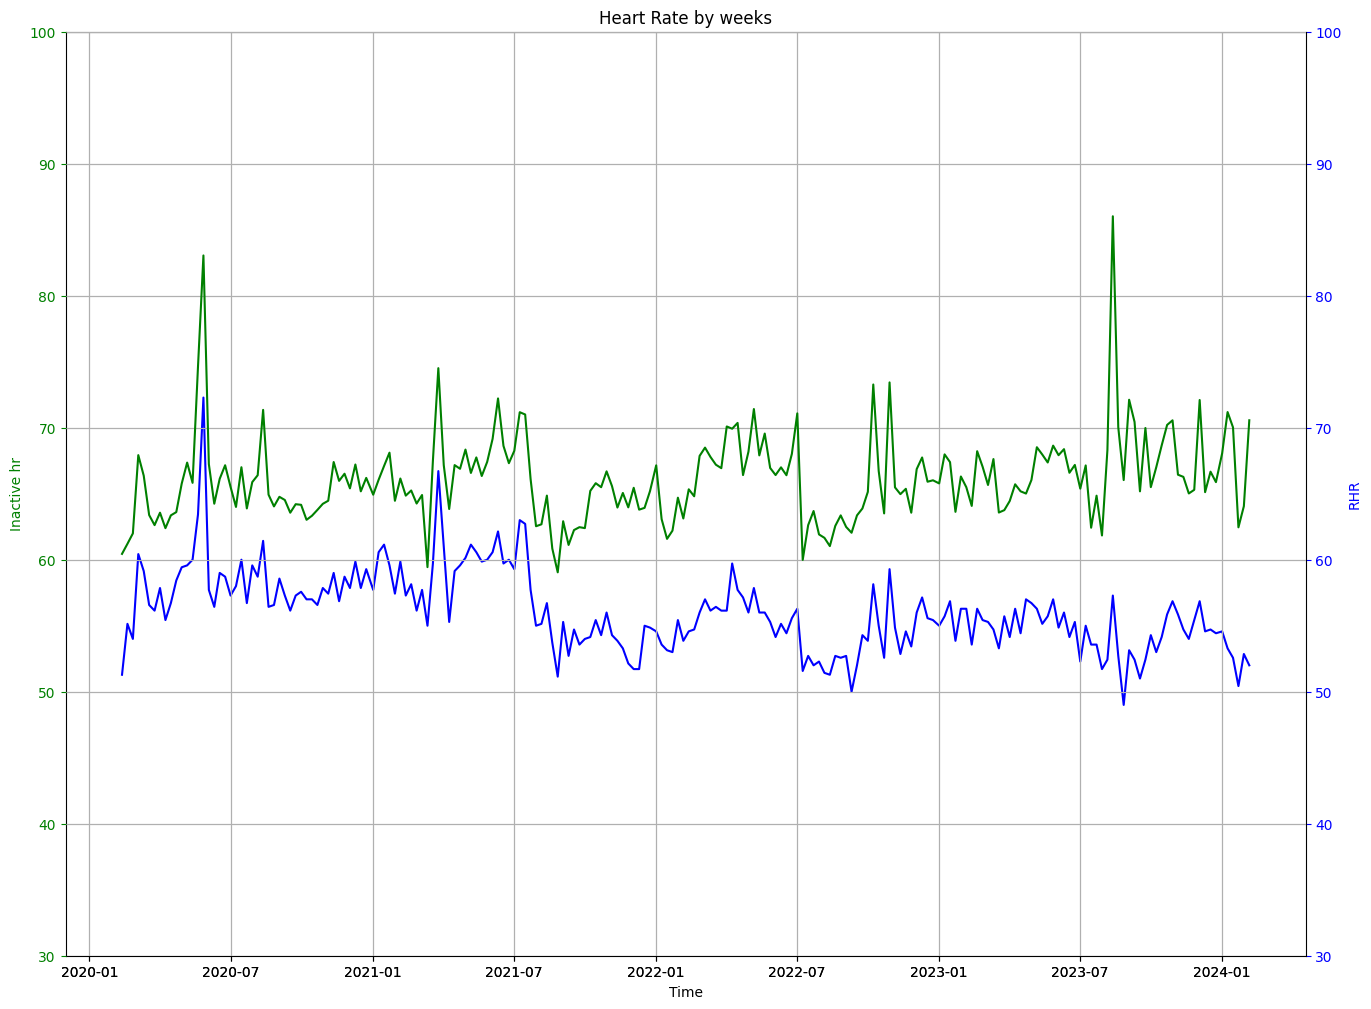

In [2]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, format_number(year_data.rhr_avg), format_number(year_data.rhr_min), format_number(year_data.rhr_max),
                       format_number(year_data.hr_avg), format_number(year_data.hr_min), format_number(year_data.hr_max)])

doc = snakemd.new_doc()
doc.add_heading("Heart Rate", 3)
doc.add_table(['Year', 'Avg Resting HR', 'Min Resting HR', 'Max Resting HR', 'Avg HR', 'Min HR', 'Max HR'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('hr', days=days_to_display)

### Intensity Minutes

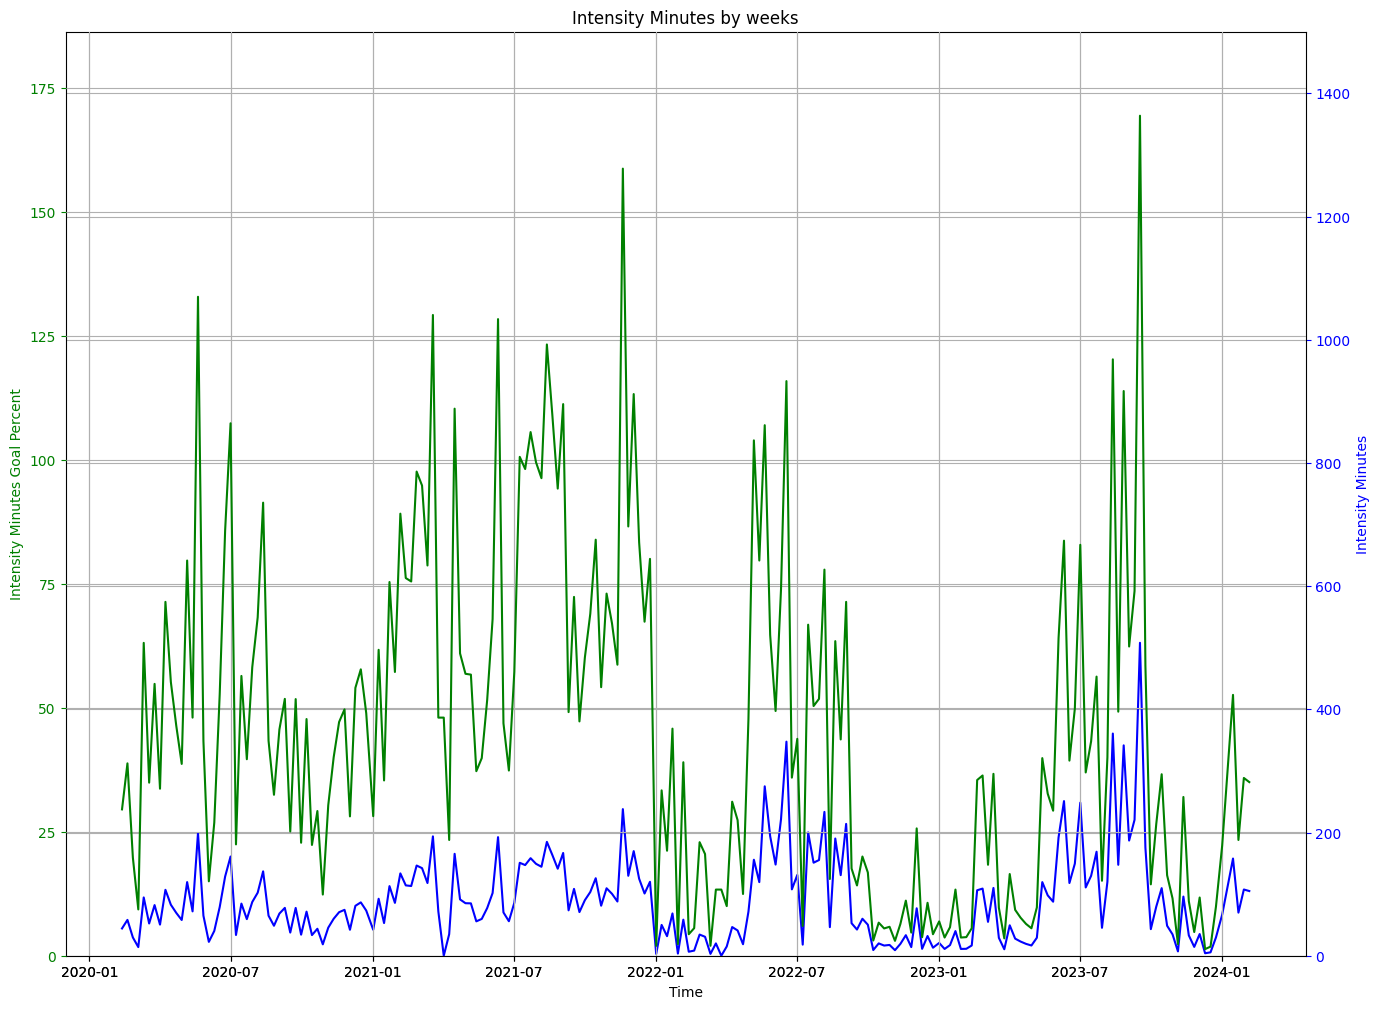

In [3]:
graph.graph_activity('itime', days=days_to_display)

### Steps

| Year | Steps   | Steaps Goal | Steps Goal % |
| ---- | ------- | ----------- | ------------ |
| 2020 | 2091546 | 365000      | 17.0         |
| 2021 | 2405847 | 365000      | 15.0         |
| 2022 | 2043452 | 365000      | 18.0         |
| 2023 | 1900271 | 365000      | 19.0         |
| 2024 | 178530  | 35000       | 20.0         |

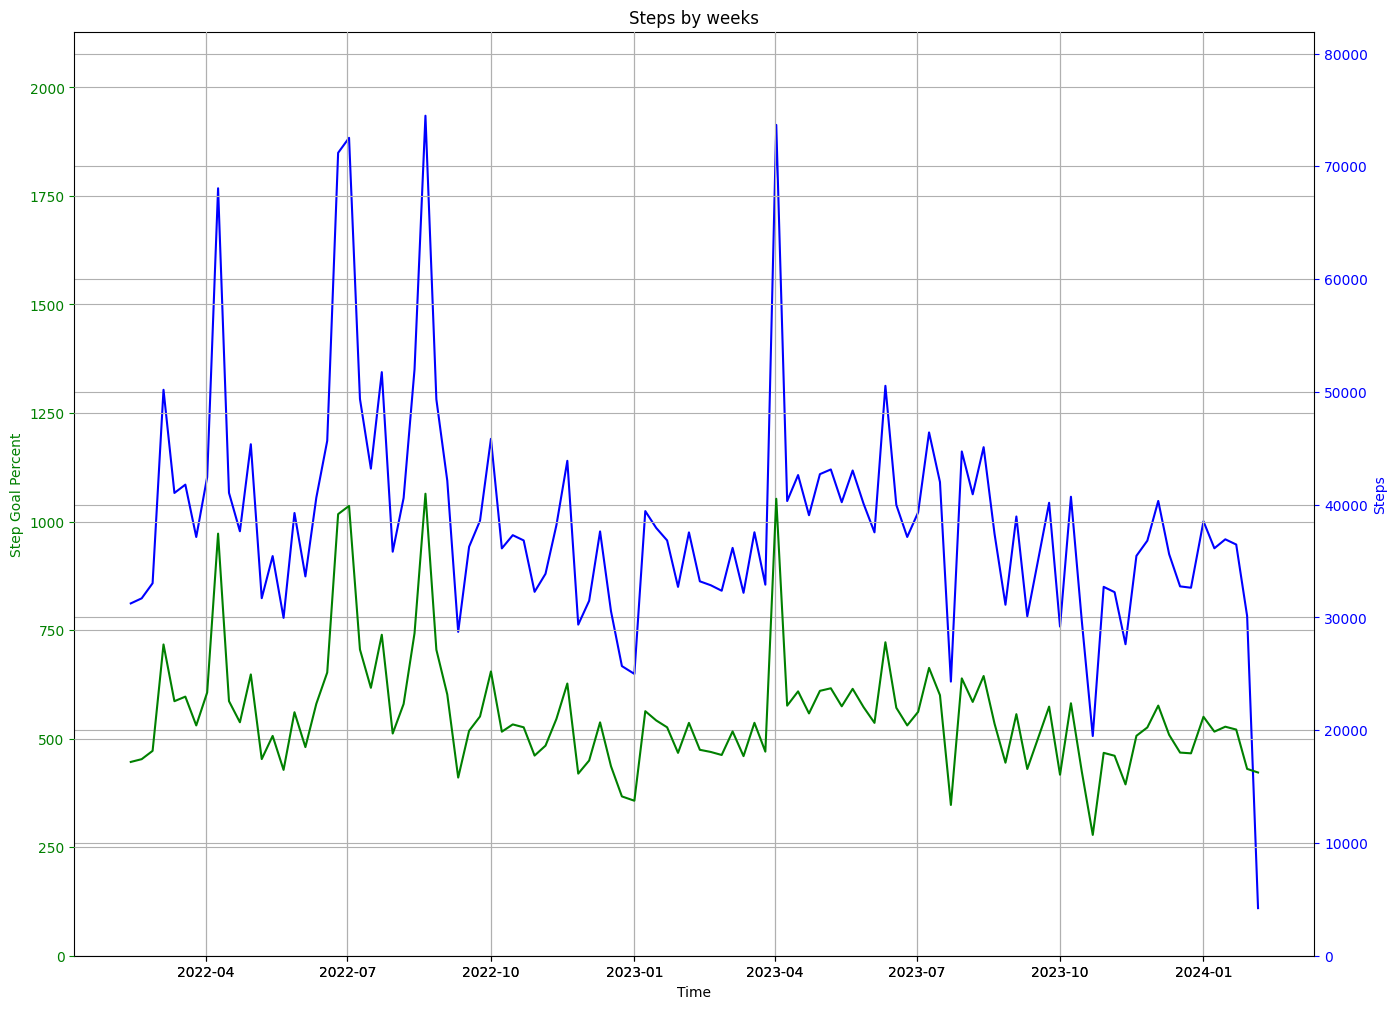

In [4]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, year_data.steps, year_data.steps_goal, format_number((year_data.steps_goal / year_data.steps) * 100.0)])

doc = snakemd.new_doc()
doc.add_heading("Steps", 3)
doc.add_table(['Year', 'Steps', 'Steaps Goal', 'Steps Goal %'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('steps')

### Weight

| Year | Avg Weight | Min Weight | Max Weight |
| ---- | ---------- | ---------- | ---------- |
| 2020 | 105.0      | 104.0      | 110.0      |
| 2021 | 106.0      | 103.0      | 111.0      |
| 2022 | 109.0      | 106.0      | 112.0      |
| 2023 | 110.0      | 108.0      | 111.0      |
| 2024 | 111.0      | 110.0      | 113.0      |

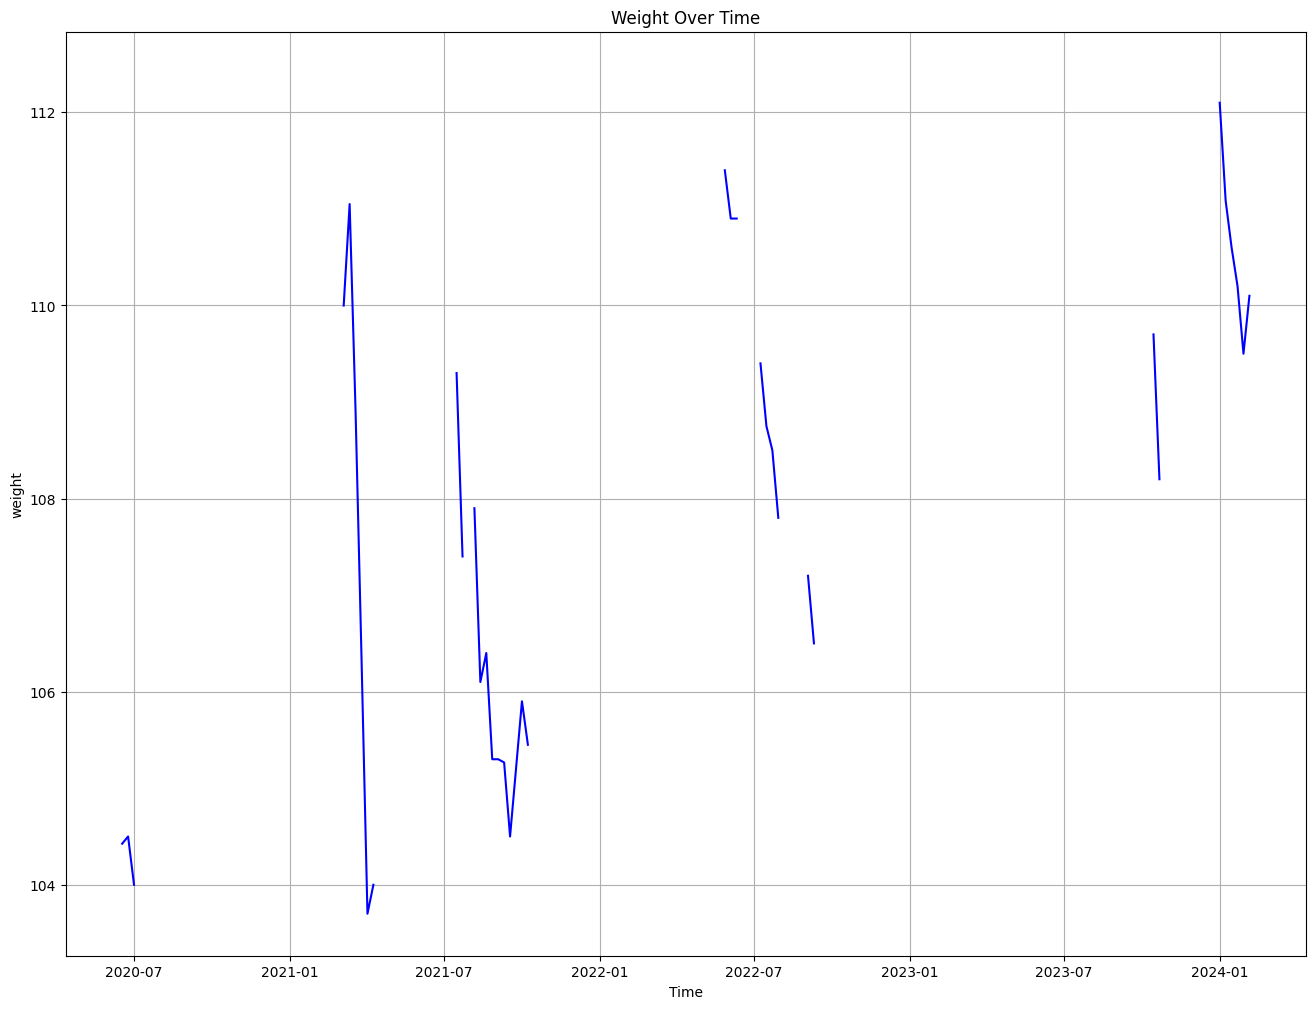

In [5]:
years_data = []
current_year = datetime.date.today().year
for year in range(current_year - years_to_display, current_year + 1):
    year_data = YearsSummary.get_year(garmin_sum_db, year)
    years_data.append([year, format_number(year_data.weight_avg), format_number(year_data.weight_min), format_number(year_data.weight_max)])

doc = snakemd.new_doc()
doc.add_heading("Weight", 3)
doc.add_table(['Year', 'Avg Weight', 'Min Weight', 'Max Weight'], years_data)
display(Markdown(str(doc)))
graph.graph_activity('weight', days=days_to_display)